In [2]:
import os
import glob
import sys

import seaborn as sns
import matplotlib
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from brainbox import trainer

from fastsnn import datasets, models, results
from fastsnn.results import util

%load_ext autoreload
%autoreload 2

In [3]:
root = os.path.join(os.path.dirname(os.getcwd()), "results/datasets")

fmnist_path = os.path.join(os.path.dirname(os.getcwd()), "data")
nmnist_path = os.path.join(os.path.dirname(os.getcwd()), "data/N-MNIST")
shd_path = os.path.join(os.path.dirname(os.getcwd()), "data/SHD")

palette = [sns.color_palette("tab10")[i] for i in [0, 1, 2]]

In [7]:
results_query = results.DatasetResultsQuery(root, fmnist_path, nmnist_path, shd_path)
results_query.build()

INFO:validator:Computing metric for e644a8f73fc44f22b413608416a9f2ad...
INFO:validator:Computing metric for 138394f21d4543ad9fa7ad9f55b5b38d...


/home/luketaylor/PycharmProjects/FastSNN/fastsnn/layers.py:105: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/TensorShape.cpp:2318.)
  self._betas_kernel = nn.Parameter(torch.cat([torch.Tensor([beta_init]) ** (t_len-i-1) for i in range(t_len)], dim=0).T.view(1, 1, 1, t_len))


INFO:validator:Computing metric for d65582554f1741b3824ec54158ee8973...
INFO:validator:Computing metric for 72ba351fd92d42558672be8f7919a5dd...
INFO:validator:Computing metric for e2fc02d785224d5488c136002dbb4f8d...
INFO:validator:Computing metric for da6dfd650bc64d56b9ec34adb4738667...
INFO:validator:Computing metric for e853556d184d4fc1b8a71e462c16078a...
INFO:validator:Computing metric for a3649141843243ee8c4fe387dab901b8...
INFO:validator:Computing metric for d74d98066a0f49ad9fe646f855aa5e79...
INFO:validator:Computing metric for 47fa8670633b42e996fb9636e72b2693...
INFO:validator:Computing metric for be1bbbf9ca1c42d5ac922660db23c737...
INFO:validator:Computing metric for dbc03c7713f346c992be4bd8d8e00b83...
INFO:validator:Computing metric for e644a8f73fc44f22b413608416a9f2ad...
INFO:validator:Computing metric for 138394f21d4543ad9fa7ad9f55b5b38d...
INFO:validator:Computing metric for d65582554f1741b3824ec54158ee8973...
INFO:validator:Computing metric for 72ba351fd92d42558672be8f7919

## Network architecture plot

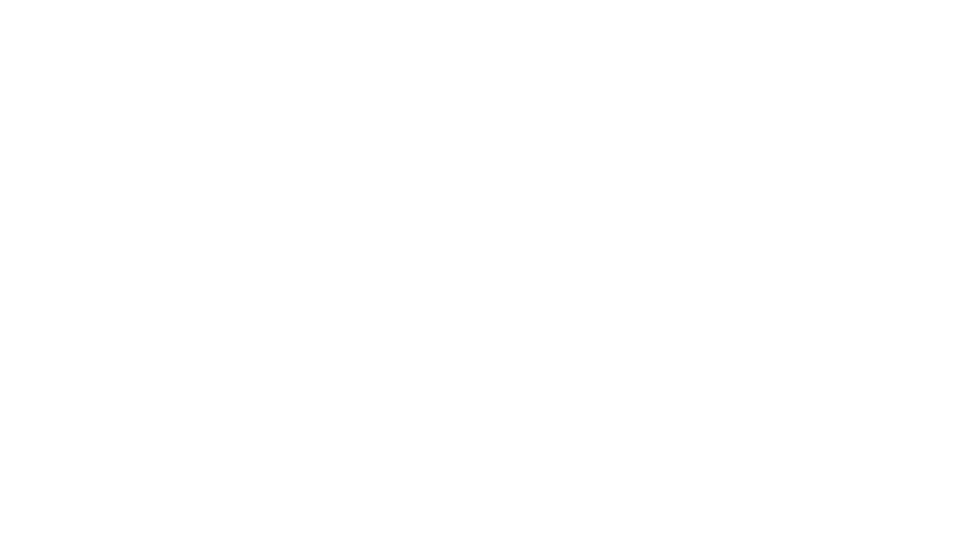

In [4]:
def plot_diagram(fig, fig_spec):
    ax = fig.add_subplot(fig_spec)
    for edge in ["top", "bottom", "left", "right"]:
        ax.spines[edge].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)
    
fig = plt.figure(figsize=(17, 10))
fig_spec = gridspec.GridSpec(1, 1)
plot_diagram(fig, fig_spec[0, 0])

## Plot network activity

In [6]:
nmnist_dataset = datasets.NMNISTDataset(nmnist_path, train=False)

0/10000
50/10000
100/10000
150/10000
200/10000
250/10000
300/10000
350/10000
400/10000
450/10000
500/10000
550/10000
600/10000
650/10000
700/10000
750/10000
800/10000
850/10000
900/10000
950/10000
1000/10000
1050/10000
1100/10000
1150/10000
1200/10000
1250/10000
1300/10000
1350/10000
1400/10000
1450/10000
1500/10000
1550/10000
1600/10000
1650/10000
1700/10000
1750/10000
1800/10000
1850/10000
1900/10000
1950/10000
2000/10000
2050/10000
2100/10000
2150/10000
2200/10000
2250/10000
2300/10000
2350/10000
2400/10000
2450/10000
2500/10000
2550/10000
2600/10000
2650/10000
2700/10000
2750/10000
2800/10000
2850/10000
2900/10000
2950/10000
3000/10000
3050/10000
3100/10000
3150/10000
3200/10000
3250/10000
3300/10000
3350/10000
3400/10000
3450/10000
3500/10000
3550/10000
3600/10000
3650/10000
3700/10000
3750/10000
3800/10000
3850/10000
3900/10000
3950/10000
4000/10000
4050/10000
4100/10000
4150/10000
4200/10000
4250/10000
4300/10000
4350/10000
4400/10000
4450/10000
4500/10000
4550/10000
4600/10000


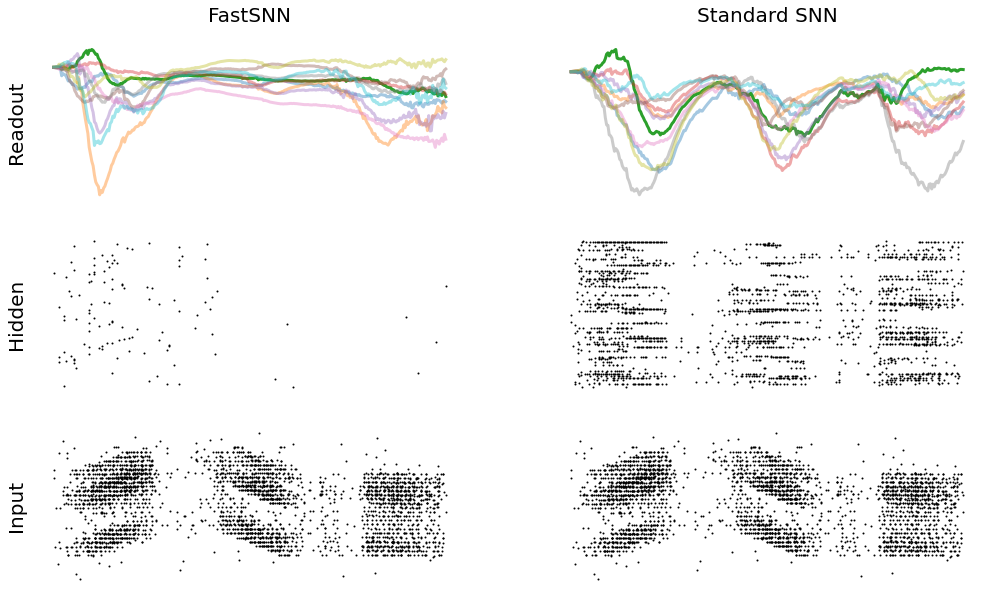

In [7]:
def plot_activity_snapshots(dataset, fig, fig_spec):
    
    def plot_activity_snapshot(input_spikes, hidden_spikes, mems, title, show_y_label, fig, fig_spec):
        snapshot_spec = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=fig_spec)
        
        def plot(ax, xlabel, ylabel, show_line=False):
            label_size = 20
            line_width = 3
            edge_width = 4
            label_pad = 8
            
            ax.tick_params(axis='both', which='major', pad=5, labelsize=10) 
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

            # x-axis
            ax.spines["bottom"].set_linewidth(edge_width)
            ax.xaxis.set_tick_params(width=0)
            ax.set_xticks([0, 25, 50])
    #         if show_line:
    #             ax.spines['bottom'].set_bounds(0, 50)
    #             ax.set_xticklabels(["", "50 sim steps", ""], fontweight="bold", fontsize=10)
    #         else:
            ax.set_xticklabels([])
            ax.spines['bottom'].set_visible(False)

            # y-axis
            ax.spines["left"].set_visible(False)
            ax.set_yticks([])
            if show_y_label:
                ax.set_ylabel(ylabel, fontsize=label_size, labelpad=label_pad)
        
        fontsize = 20
        fontpad = 20
        dot_size = 1
        
        input_spikes_x, input_spikes_y = util.tensor_to_coordinates(input_spikes)
        hidden_spikes_x, hidden_spikes_y = util.tensor_to_coordinates(hidden_spikes)
        mems = util.mem_tensor_to_lists(mems)
        
        # Plot input spikes
        ax = fig.add_subplot(snapshot_spec[2, 0])
        ax.scatter(input_spikes_x, input_spikes_y, s=dot_size, c="black")
        plot(ax, None, "Input", show_line=True)
        fig.add_subplot(ax)
        
        # Plot hidden spikes
        ax = fig.add_subplot(snapshot_spec[1, 0])
        ax.scatter(hidden_spikes_x, hidden_spikes_y, s=dot_size, c="black")
        plot(ax, None, "Hidden")
        fig.add_subplot(ax)
        
        # Plot membrane potentials
        ax = fig.add_subplot(snapshot_spec[0, 0])
        for i in range(len(mems)):
            alpha = 1 if i == 2 else 0.4
            ax.plot(mems[i], color=sns.color_palette("tab10")[i], linewidth=3, alpha=alpha)
        plot(ax, None, "Readout")
        ax.set_title(title, fontsize=fontsize, pad=fontpad)
        fig.add_subplot(ax)
    
    # FastSNN
    model = trainer.load_model(os.path.join(root, "nmnist"), "4f35dd4349464521a6bae74d630749a2", results.datasets.ResultsBuilderMapper.model_loader)
    input_spikes, fast_hidden_spikes, fast_mems = util.get_get_output(dataset, model, 0)
    
    # Standard SNN
    model = trainer.load_model(os.path.join(root, "nmnist"), "840b4a2834ee42edad06a025f1ce8580", results.datasets.ResultsBuilderMapper.model_loader)
    input_spikes, standard_hidden_spikes, standard_mems = util.get_get_output(dataset, model, 0)
    
    model_spec = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=fig_spec)
    plot_activity_snapshot(input_spikes, fast_hidden_spikes, fast_mems, "FastSNN", True, fig, model_spec[0, 0])
    plot_activity_snapshot(input_spikes, standard_hidden_spikes, standard_mems, "Standard SNN", False, fig, model_spec[0, 1])
    
fig = plt.figure(figsize=(17, 10))
fig_spec = gridspec.GridSpec(1, 1)

plot_activity_snapshots(nmnist_dataset, fig, fig_spec[0, 0])

## Summary statistics plots

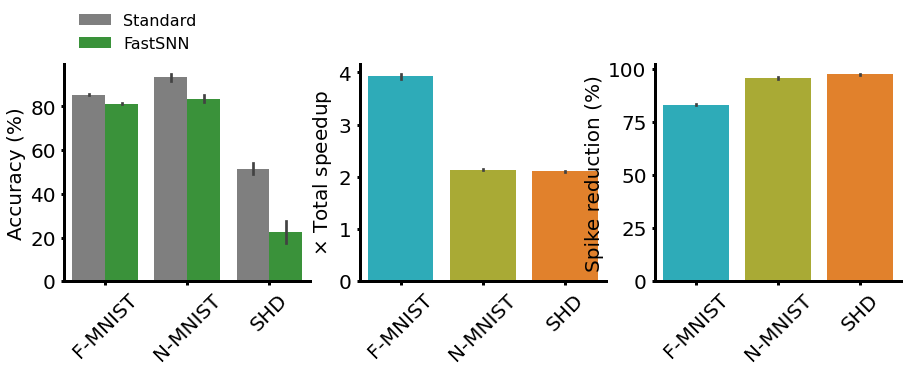

In [18]:
 def summary_plot(ax, xlabel, ylabel):
    title_size = 16
    label_size = 20
    line_width = 3
    edge_width = 3
    errwidth = 2

    ax.tick_params(axis='both', which='major', pad=5, labelsize=label_size) 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # x-axis
    ax.spines["bottom"].set_linewidth(edge_width)
    ax.xaxis.set_tick_params(width=edge_width)
    ax.set_xlabel(xlabel, fontsize=label_size)
    ax.set_xticklabels(["F-MNIST", "N-MNIST", "SHD"], rotation=45, ha="center")

    # y-axis
    ax.spines["left"].set_linewidth(edge_width)
    ax.yaxis.set_tick_params(width=edge_width)
    ax.set_ylabel(ylabel, fontsize=label_size)

    return ax

def plot_accuracy(fig, fig_spec):
    ax = fig.add_subplot(fig_spec)
    sns.barplot(data=results_df, x="dataset", y="accuracy", hue="fast_layer", palette=[sns.color_palette("tab10")[i] for i in [7, 2]], ci="sd")
    summary_plot(ax, None, "Accuracy (%)")
    current_handles, current_labels = ax.get_legend_handles_labels()
    current_labels[0] = "Standard"
    current_labels[1] = "FastSNN"
    #ax.legend(current_handles, current_labels, fontsize=14, title_fontsize=14, frameon=False)
    ax.legend(current_handles, current_labels, title=None, loc="upper left", fontsize=16, title_fontsize=16, frameon=False, bbox_to_anchor=(0, 1.3)) 
    fig.add_subplot(ax)

def plot_speedup(fig, fig_spec):
    ax = fig.add_subplot(fig_spec)
    sns.barplot(data=statistics_df, x="dataset", y="speedup", palette=[sns.color_palette("tab10")[i] for i in [9, 8, 1]], ci="sd")
    summary_plot(ax, None, "$\\times$ Total speedup")
    fig.add_subplot(ax) 

def plot_spike_reduction(fig, fig_spec):
    ax = fig.add_subplot(fig_spec)
    sns.barplot(data=statistics_df, x="dataset", y="spike_reduction", palette=[sns.color_palette("tab10")[i] for i in [9, 8, 1]], ci="sd")
    summary_plot(ax, None, "Spike reduction (%)")
    fig.add_subplot(ax) 

statistics_df = results_query.get_comparative_results_df()
results_df = results_query.get_results_df()

fig = plt.figure(figsize=(15, 4))
fig_spec = gridspec.GridSpec(1, 3)

plot_accuracy(fig, fig_spec[0, 0])
plot_speedup(fig, fig_spec[0, 1])
plot_spike_reduction(fig, fig_spec[0, 2])

## Accuracy vs metrics plots

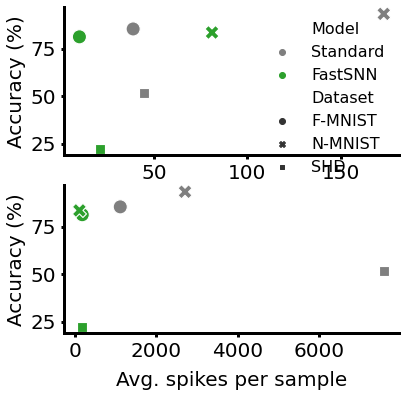

In [20]:
def blob_plot(ax, xlabel, ylabel):
    title_size = 16
    label_size = 20
    line_width = 3
    edge_width = 3
    errwidth = 2

    ax.tick_params(axis='both', which='major', pad=5, labelsize=label_size) 
    ax.spines["top"].set_linewidth(edge_width)
    ax.spines["bottom"].set_linewidth(edge_width)
    ax.xaxis.set_tick_params(width=edge_width)
    ax.set_xlabel(xlabel, fontsize=label_size, labelpad=10)

    # y-axis
    ax.spines["right"].set_linewidth(edge_width)
    ax.spines["left"].set_linewidth(edge_width)
    ax.yaxis.set_tick_params(width=edge_width)
    ax.set_ylabel(ylabel, fontsize=label_size)
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    return ax

def plot_accuracy_vs_duration(fig, fig_spec):
    ax = fig.add_subplot(fig_spec)
    blob_plot(ax, "Avg. time per batch (ms)", "Accuracy (%)")
    sns.scatterplot(data=mean_results_df, x="duration", y="accuracy", hue="fast_layer", style="dataset", s=dot_sizes, palette=[sns.color_palette("tab10")[i] for i in [7, 2]])

    current_handles, current_labels = ax.get_legend_handles_labels()
    current_labels[0] = "Model"
    current_labels[1] = "Standard"
    current_labels[2] = "FastSNN"
    current_labels[3] = "Dataset"
    current_labels[4] = "F-MNIST"
    current_labels[5] = "N-MNIST"
    current_labels[6] = "SHD"
    ax.legend(current_handles, current_labels, fontsize=16, title_fontsize=16, frameon=False)
    fig.add_subplot(ax)

def plot_accuracy_vs_spikes(fig, fig_spec):
    ax = fig.add_subplot(fig_spec)
    blob_plot(ax, "Avg. spikes per sample", "Accuracy (%)")
    sns.scatterplot(data=mean_results_df, x="spike_counts", y="accuracy", hue="fast_layer", style="dataset", s=dot_sizes, palette=[sns.color_palette("tab10")[i] for i in [7, 2]])
    ax.legend().set_visible(False)
    fig.add_subplot(ax)

mean_results_df = results_query.get_mean_results_df()
dot_sizes = 200
    
fig = plt.figure(figsize=(6, 6))
fig_spec = gridspec.GridSpec(2, 1)
plot_accuracy_vs_duration(fig, fig_spec[0, 0])
plot_accuracy_vs_spikes(fig, fig_spec[1, 0])

## Omnipotent plot

In [21]:
def plot_letter(letter, fig_spec, scale=1, yshift=0):
    shift = 0.2
    fontsize = 25
    ax = plt.Subplot(fig, fig_spec)
    ax.text(-shift/scale, 1.2+yshift, letter, horizontalalignment="right", verticalalignment="top", transform=ax.transData, fontweight="bold", fontsize=fontsize)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.patch.set_alpha(0)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    fig.add_subplot(ax)

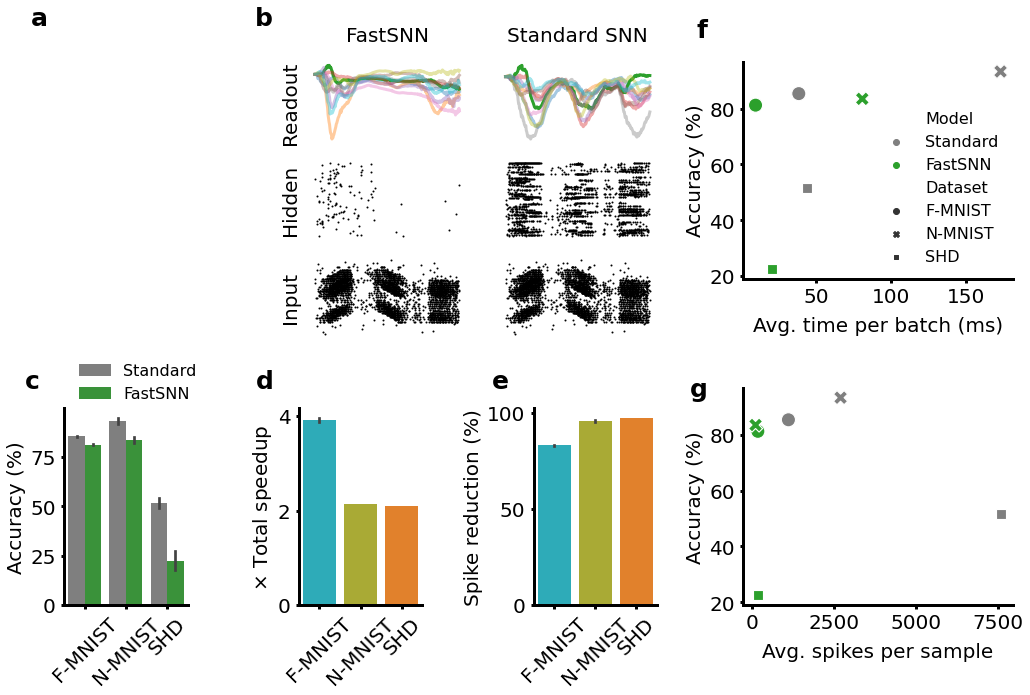

In [22]:
fig = plt.figure(figsize=(17, 10))
fig_spec = gridspec.GridSpec(1, 2, hspace=0, wspace=0.2, width_ratios=[2.2, 1])
left_spec = gridspec.GridSpecFromSubplotSpec(2, 1, hspace=0.3, subplot_spec=fig_spec[0, 0], height_ratios=[1.4, 1])
topleft_spec = gridspec.GridSpecFromSubplotSpec(1, 2, wspace=0.3, subplot_spec=left_spec[0, 0], width_ratios=[1, 2.1])

summary_spec = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=left_spec[1, 0], wspace=0.9)
blob_spec = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=fig_spec[0, 1], hspace=0.5)

plot_diagram(fig, topleft_spec[0, 0])
plot_activity_snapshots(nmnist_dataset, fig, topleft_spec[0, 1])

# Summary statistics
plot_accuracy(fig, summary_spec[0, 0])
plot_speedup(fig, summary_spec[0, 1])
plot_spike_reduction(fig, summary_spec[0, 2])

# Blobs
plot_accuracy_vs_duration(fig, blob_spec[0, 0])
plot_accuracy_vs_spikes(fig, blob_spec[1, 0])

plot_letter("a", topleft_spec[0, 0], scale=2)
plot_letter("b", topleft_spec[0, 1], scale=2)
plot_letter("c", summary_spec[0, 0], scale=1)
plot_letter("d", summary_spec[0, 1], scale=1)
plot_letter("e", summary_spec[0, 2], scale=1)
plot_letter("f", blob_spec[0, 0], scale=1.5)
plot_letter("g", blob_spec[1, 0], scale=1.5, yshift=-0.15)